In this tutorial you will learn how to apply **pivot_table** function to improve your EDA.

You will apply it on the Titanic dataset, and use the just built knowledge to compute some probabilities about the survival of the Titanic passengers.

### Import libraries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [9]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Drop some columns to simplify our analysis

In [10]:
df.drop(['PassengerId','Ticket','Name'],inplace=True,axis=1)

### Grouping data using index in a Pivot Table

In [11]:
grouped = pd.pivot_table(data=df,index=['Sex'])
grouped

,Age,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,
female,27.915709,44.479818,0.649682,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,2.389948,0.429809,0.188908


<AxesSubplot:xlabel='Sex'>

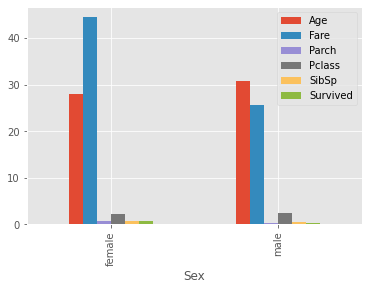

In [12]:
grouped.plot(kind='bar')

### Pivot Table with multi-index

In [13]:
grouped = pd.pivot_table(df,index=['Sex','Pclass'])
grouped

Age        Fare     Parch     SibSp  Survived
Sex    Pclass                                                     
female 1       34.611765  106.125798  0.457447  0.553191  0.968085
       2       28.722973   21.970121  0.605263  0.486842  0.921053
       3       21.750000   16.118810  0.798611  0.895833  0.500000
male   1       41.281386   67.226127  0.278689  0.311475  0.368852
       2       30.740707   19.741782  0.222222  0.342593  0.157407
       3       26.507589   12.661633  0.224784  0.498559  0.135447

### Aggregation function in Pivot Tables

Now we apply **aggfunc** which accepts a function or list of functions you’d like to use on your group (default: np.mean)

In [14]:
grouped = pd.pivot_table(df,index=['Sex','Pclass'],aggfunc={'Age':np.mean,'Survived':np.sum})
grouped

Age  Survived
Sex    Pclass                     
female 1       34.611765        91
       2       28.722973        70
       3       21.750000        72
male   1       41.281386        45
       2       30.740707        17
       3       26.507589        47

### Aggregate on specific features with values parameter

You can define feature(s) to apply the aggregate function on by using **value** parameter.


In [15]:
grouped = pd.pivot_table(df,index=['Sex','Pclass'],values=['Survived'], aggfunc=np.sum)
grouped

Survived
Sex    Pclass          
female 1             91
       2             70
       3             72
male   1             45
       2             17
       3             47

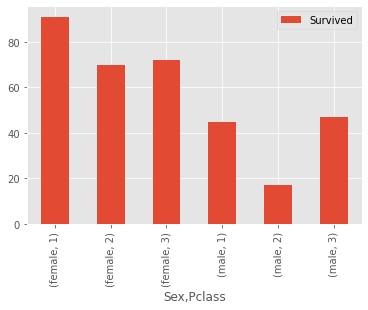

In [16]:
grouped.plot(kind='bar');

### How to use **columns** parameter

Columns parameter can be use to find relationships between features. 

Columns parameter displays values horizontally on the top of the resultant table

In [17]:
grouped = pd.pivot_table(df,index=['Sex'],columns=['Pclass'],values=['Survived'],aggfunc=np.sum)
grouped

Survived        
Pclass        1   2   3
Sex                    
female       91  70  72
male         45  17  47

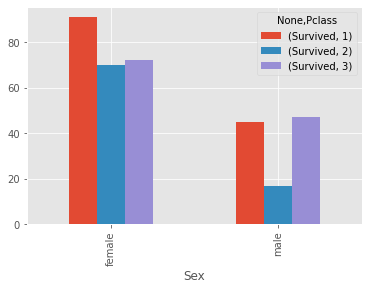

In [18]:
grouped.plot(kind='bar');

### Handling missing data in Pivot Tables

Explore the data to see missing vaules

In [20]:
grouped = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean)
grouped

Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000        NaN  13.500000
                2             NaN        NaN  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500        NaN  36.121667
                2        1.000000        NaN  17.095000
                3       18.488571  29.000000  22.933333

Pandas pivot_table allows you to handle missing data in two ways:
* dropna - drops all null values in pivot table
* fill_value - replace all null values in pivot table with the specified values

Let's replace NaN values with the mean value from the ‘Age’ column

In [22]:
grouped = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean,fill_value=np.mean(df['Age']))
grouped

Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000  29.699118  13.500000
                2       29.699118  29.699118  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500  29.699118  36.121667
                2        1.000000  29.699118  17.095000
                3       18.488571  29.000000  22.933333

**References**

* https://www.analyticsvidhya.com/blog/2020/03/pivot-table-pandas-python/
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

## Exercises

In [23]:
df = pd.read_csv("titanic.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [25]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


**Exercise 1**

Write a Pandas program to create a Pivot table and calculate how many women and men were in a particular.

pclass    1    2    3
sex                  
female   94   76  144
male    122  108  347


**Exercise 2**

Write a Pandas program to create a Pivot table and find number of survivors and average rate grouped by gender and class.

pclass    1    2    3
sex                  
female   94   76  144
male    122  108  347


**Exercise 3**

Write a Pandas program to create a Pivot table and find number of adult male, adult female and children.

       sex
who       
child   83
man    537
woman  271


**Exercise 4**

Write a Pandas program to create a Pivot table and separate the gender according to whether they traveled alone or not to get the probability of survival. 

class            First    Second     Third
sex    alone                              
female False  0.966667  0.931818  0.416667
       True   0.970588  0.906250  0.616667
male   False  0.425532  0.277778  0.180723
       True   0.333333  0.097222  0.121212


**Exercise 5.**

Write a Pandas program to create a Pivot table and find the probability of survival by class, gender, solo boarding and port of embarkation.

embark_town  Cherbourg                     Queenstown                   \
class            First    Second     Third      First Second     Third   
sex    alone                                                             
female False  1.000000  1.000000  0.611111        1.0    NaN  0.625000   
       True   0.944444  1.000000  0.800000        NaN    1.0  0.760000   
male   False  0.473684  0.166667  0.500000        0.0    NaN  0.100000   
       True   0.347826  0.250000  0.151515        NaN    0.0  0.068966   

embark_town  Southampton                      
class              First    Second     Third  
sex    alone                                  
female False    0.941176  0.923077  0.327586  
       True     1.000000  0.892857  0.466667  
male   False    0.407407  0.300000  0.142857  
       True     0.326923  0.089552  0.123762  
